- Data processing
- Feature Engineering
- Model implementation
- Analysis evaluation
- instruction

# Machine Learning - Assignment 1

> Hoang Dang - s3927234

> This notebook will guide you through a series of steps in solving a real world problem with the application of Machine Learning. We will begin by `data processing & analysis`, then `implementing the chosen models`, then lastly `performing evaluation`.

---

> đừng làm cầu kì trước Hoàng ạ, tập trung vào những cái cốt lõi trước, làm các ý ra, kiểu phân tích data xem được cái gì, trang trí thì để sau. Các ý này có thể dùng hỏi thầy để xin feedback. Đọc kĩ tác dụng của từng columns nữa

The following describes the dataset columns:
- ID:	Patient ID
- Status:	0 = no diabetes 1 = prediabetes or diabetes
- HighBP:	0 = no high BP 1 = high BP
- HighChol:	0 = no high cholesterol 1 = high cholesterol
- CholCheck:	0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
- BMI:	Body Mass Index
- Smoker:	Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
- Stroke:	(Ever told) you had a stroke. 0 = no 1 = yes
- HeartDiseaseorAttack:	coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
- PhysActivity:	physical activity in past 30 days - not including job 0 = no 1 = yes
- Fruits:	Consume Fruit 1 or more times per day 0 = no 1 = yes
- Veggies:	Consume Vegetables 1 or more times per day 0 = no 1 = yes
- HvyAlcoholConsump:	Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week) 0 = no 1 = yes
- AnyHealthcare:	Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
- NoDocbcCost:	Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
- GenHlth:	Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
- MentHlth:	Now thinking about your mental health, which includes stress, depression, and problems with emotions, for how many days during the past 30 days was your mental health not good? scale 1-30 days
- PhysHlth:	Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30 days was your physical health not good? scale 1-30 days
- DiffWalk:	Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
- Sex:	0 = female 1 = male
- Age:	13-level age category: 1 = 18-24 9 = 60-64 13 = 80 or older
- Education:	Education level: scale 1-6 1 = Never attended school or only kindergarten 2 = Grades 1 through 8 (Elementary) 3 = Grades 9 through 11 (Some high school) 4 = Grade 12 or GED (High school graduate) 5 = College 1 year to 3 years (Some college or technical school) 6 = College 4 years or more (College graduate)
- Income:	Income scale: scale 1-8 1 = less than $10,000 5 = less than $35,000 8 = $75,000 or more
- ExtraMedTest: 	The result of an extra medical test, range (-100, 100)
- ExtraAlcoholTest: 	The result of an extra alcohol test, range (-100, 100)

## Data Processing

We begin by importing the necessary libraries, which includes of
- `Pandas` for data manipulation and analysis
- `Numpy` for numerical computing
- `Matplotlib` and `Seaborn` for data visualization

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
health_data = pd.read_csv("data_train.csv", delimiter=",", index_col="Id")
health_data.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,0.811519,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,0.391096,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


In [3]:
health_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202944 entries, 0 to 202943
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHlth               202944 non-null  int64
 14  MentHlth              202944 non-null  int64
 15  PhysHlth              202944 non-null  

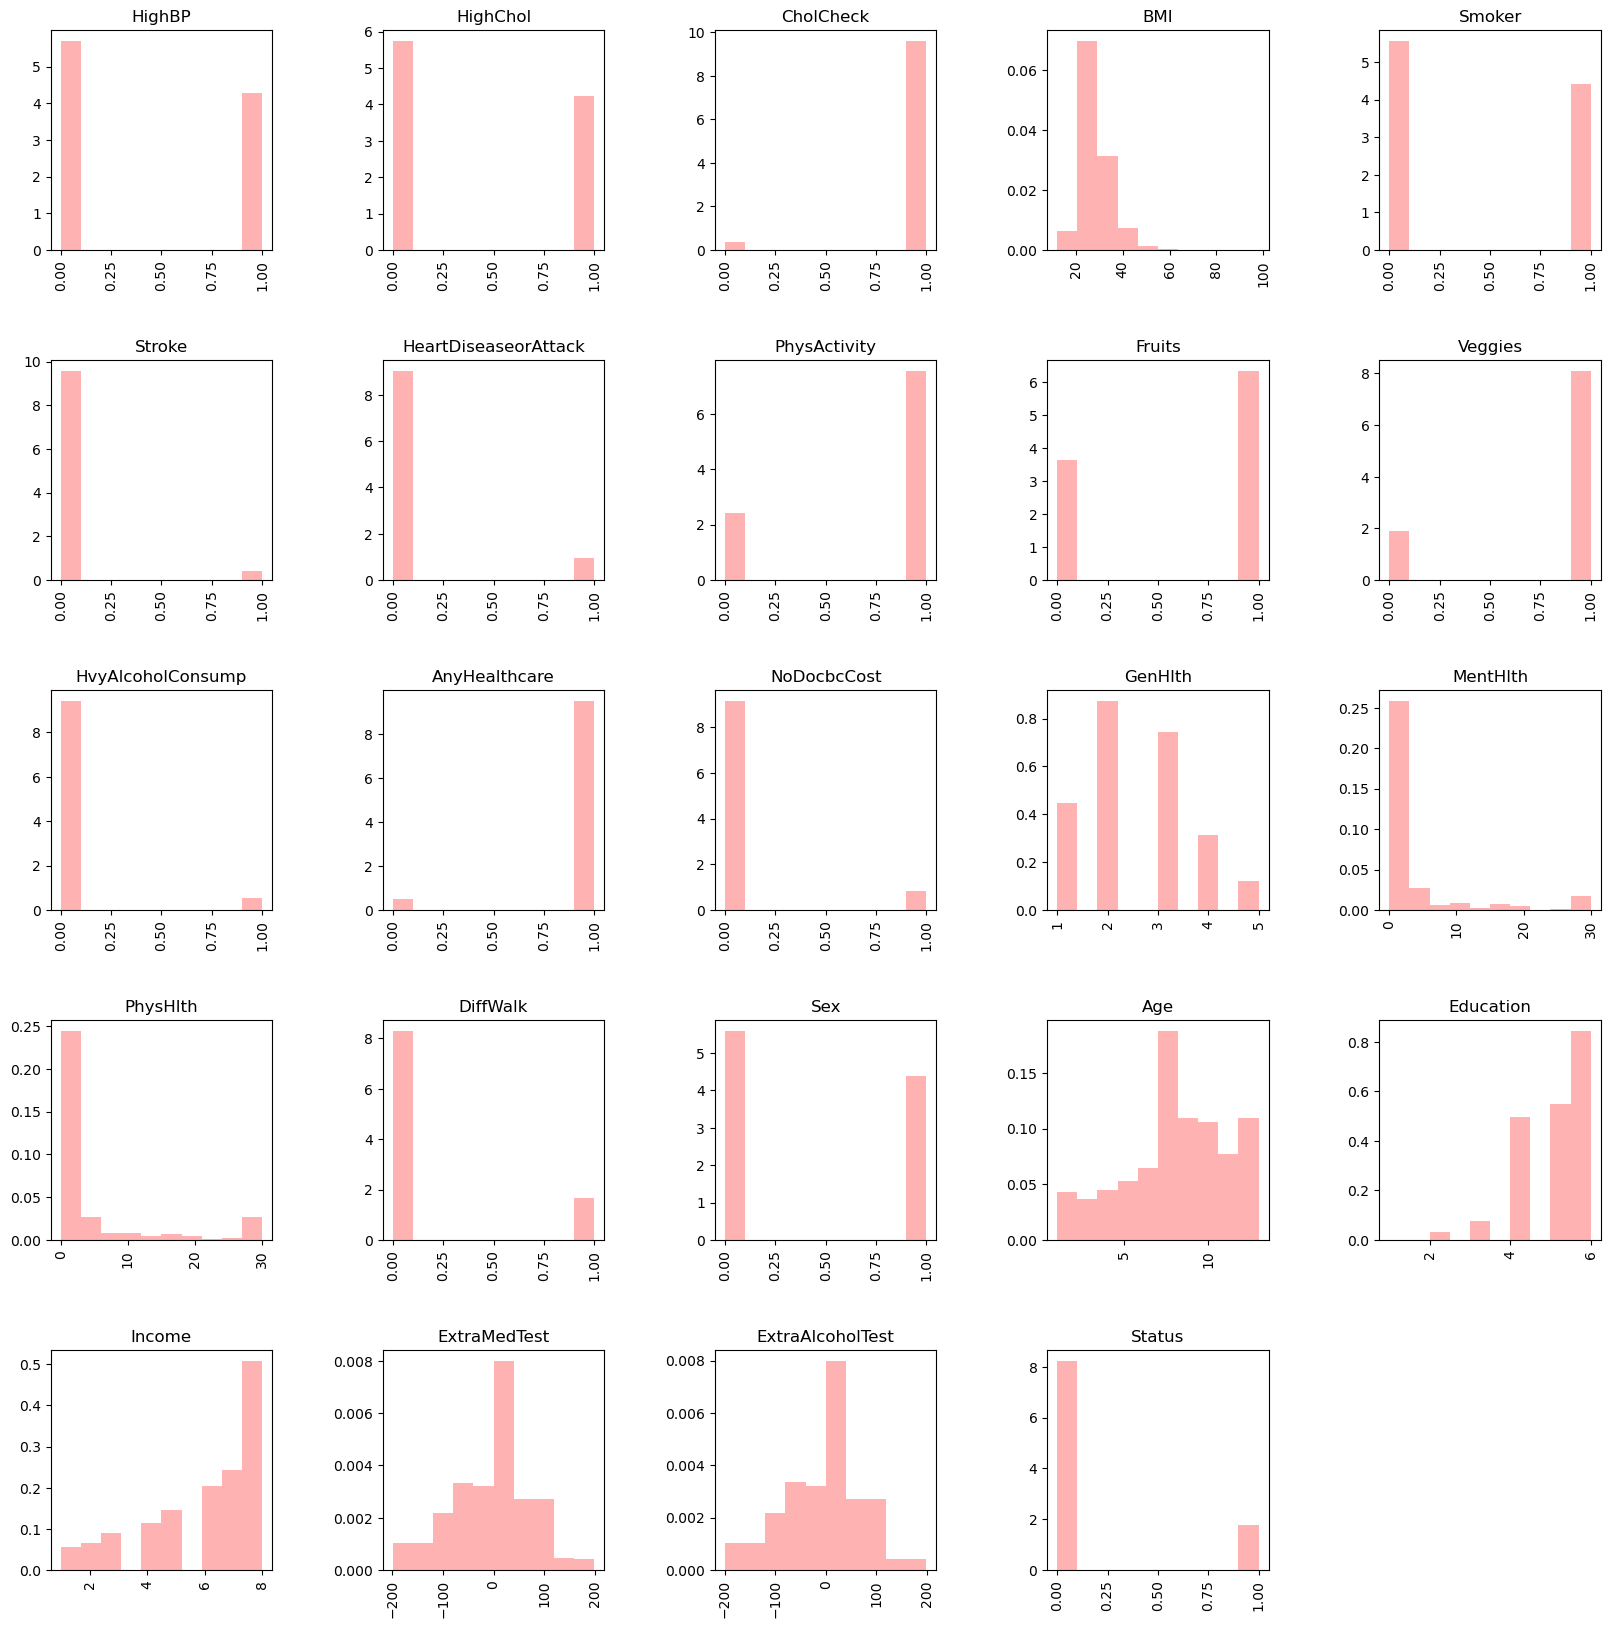

In [4]:
plt.figure(figsize=(20,20))
for i, col in enumerate(health_data.columns):
    plt.subplot(5,5,i+1)
    plt.hist(health_data[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')

plt.subplots_adjust(wspace=0.5, hspace=0.5)


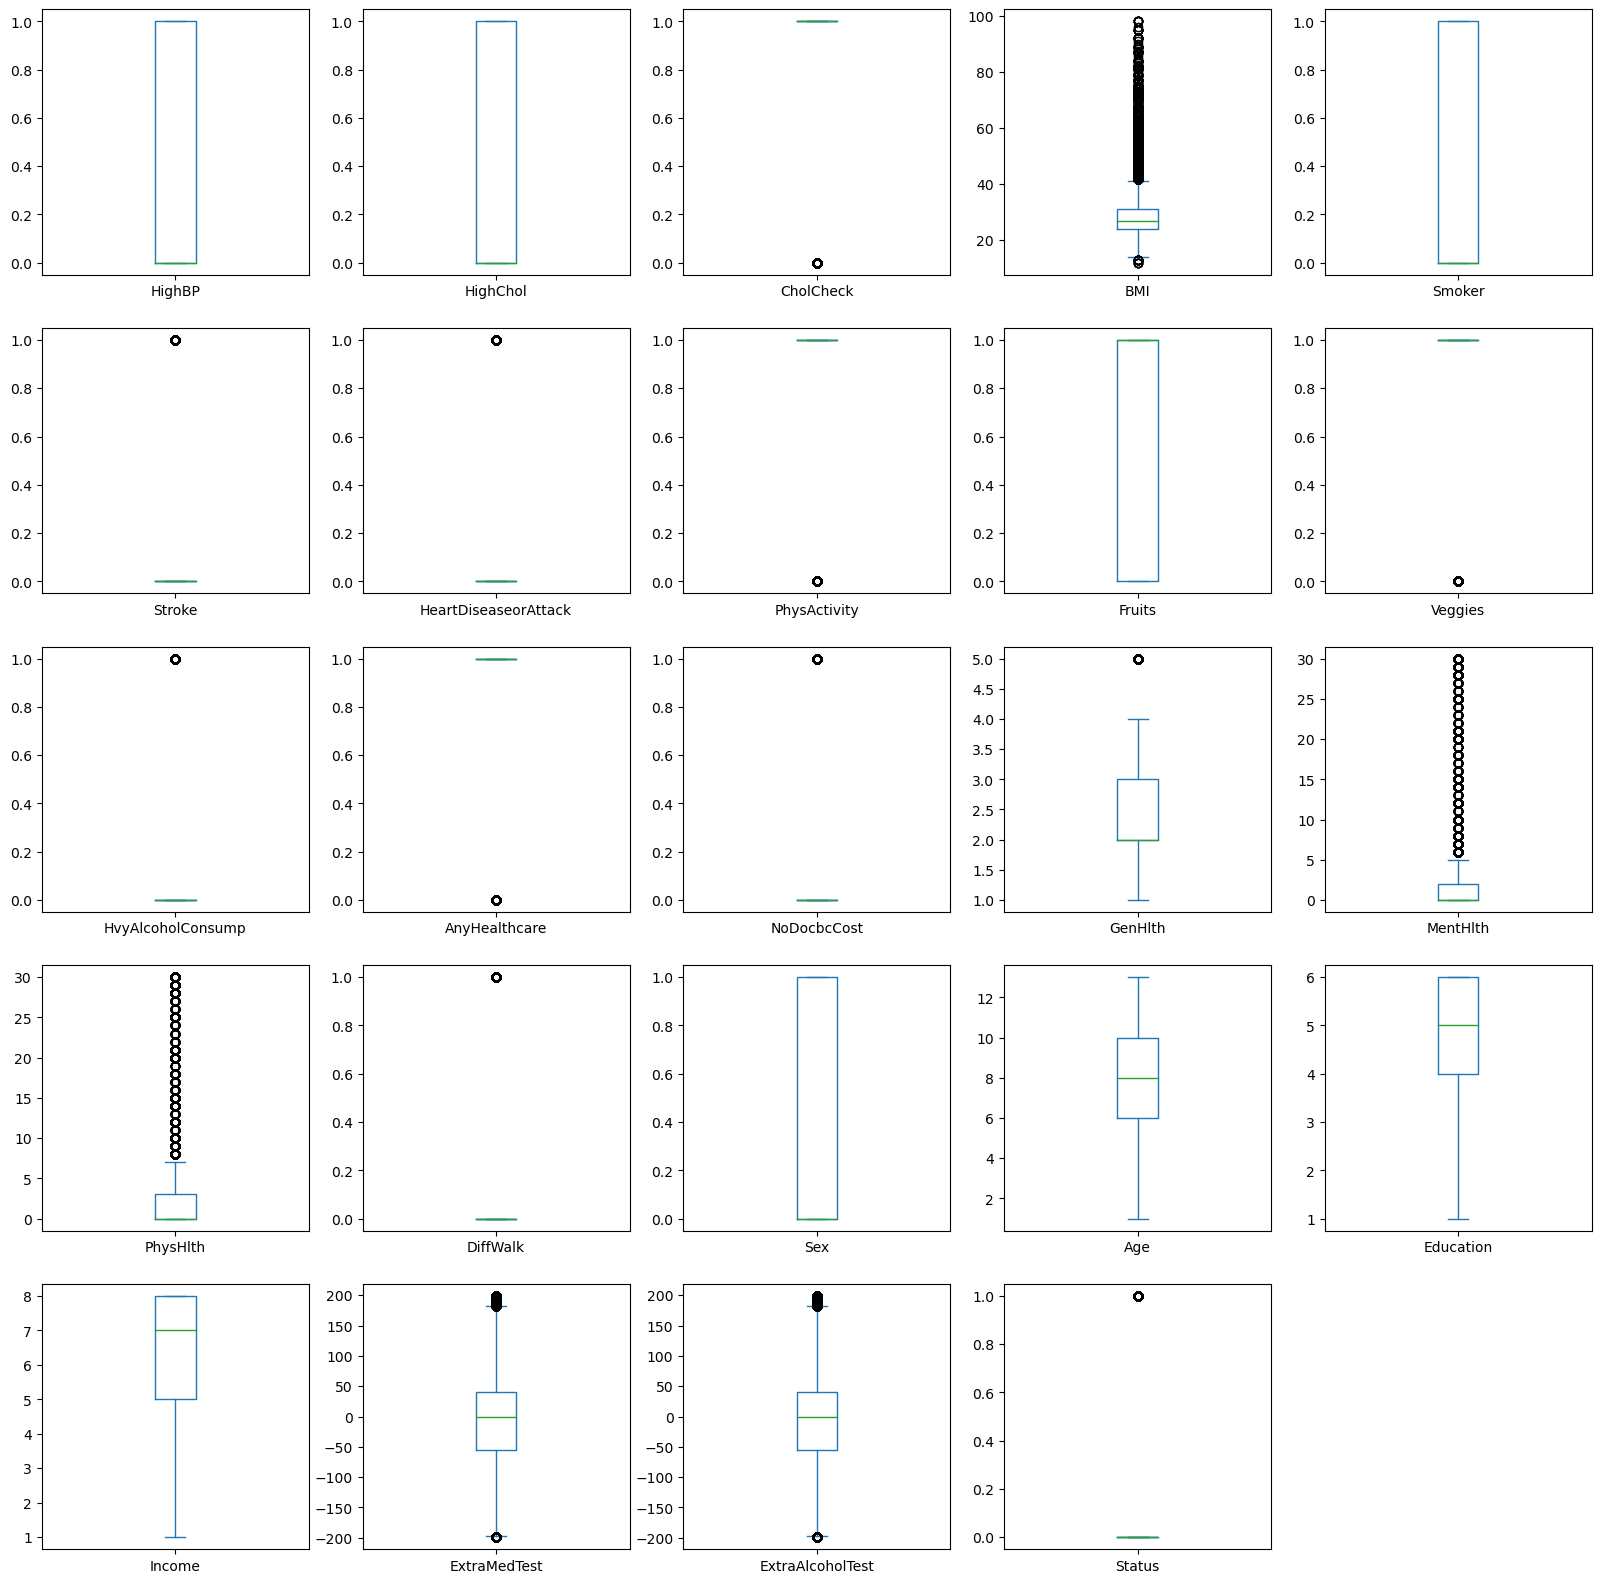

In [5]:
health_data.plot(kind='box', subplots=True, layout=(5, 5), sharex=False, sharey=False, figsize=(20, 20))
plt.show()

<Axes: title={'center': 'Hi'}>

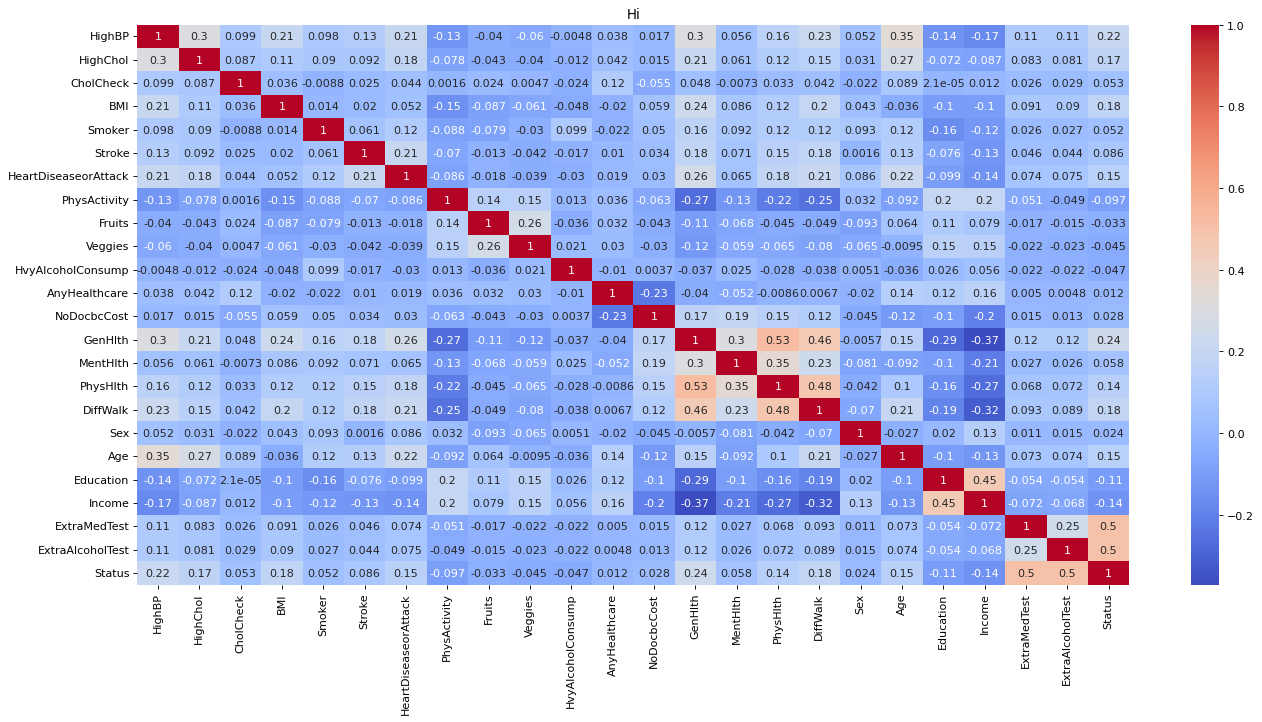

In [6]:
corr = health_data.corr()
fig = plt.figure(figsize=(20, 20), dpi=80)
ax1 = fig.add_subplot(211)
ax1.set_title("Hi")
sns.heatmap(corr, annot=True, cmap="coolwarm")

In [7]:
# target variable
y = health_data.Status

feature_names = ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'ExtraMedTest', 'ExtraAlcoholTest']
X = health_data[feature_names].copy()

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

# Break off validation set from training data
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

print(train_X.shape)
print(val_X.shape)

#specify the model. For model reproducibility, set a numeric value for random_state
model = DecisionTreeRegressor(random_state=1)
model_2 = LinearRegression()
model_3 = Ridge()
model_4 = DecisionTreeClassifier(random_state=1)

# Fit the model
model.fit(train_X, train_y)
model_2.fit(train_X, train_y)
model_3.fit(train_X, train_y)
model_4.fit(train_X, train_y)

predictions = model.predict(val_X)
predictions_2 = model_2.predict(val_X)
predictions_3 = model_3.predict(val_X)
predictions_4 = model_4.predict(val_X)

print("Mean absolute error of model 1: ", mean_absolute_error(val_y, predictions))
print("Mean absolute error of model 2: ", mean_absolute_error(val_y, predictions_2), "coefs: ", model_2.coef_, "intecept: ", model_2.intercept_)
print("Mean absolute error of model 3: ", mean_absolute_error(val_y, predictions_3))
print("Mean absolute error of model 4: ", mean_absolute_error(val_y, predictions_4))

(162355, 23)
(40589, 23)
Mean absolute error of model 1:  0.06553499716672005
Mean absolute error of model 2:  0.22371393093473166 coefs:  [ 4.27082660e-02  3.36809091e-02  2.37727756e-02  3.84115453e-03
 -3.54947397e-03  1.50097864e-02  3.54347162e-02 -2.02643567e-03
 -1.24150664e-03 -3.76268948e-04 -2.98685077e-02  1.36587621e-02
 -2.50498182e-03  2.71702859e-02 -2.29629653e-04 -1.61033431e-05
  2.36318262e-02  8.59913217e-03  4.17454778e-03 -2.99497801e-03
 -3.96611136e-03  1.86088699e-03  1.86324985e-03] intecept:  -0.04151597243021435
Mean absolute error of model 3:  0.22371395453233076
Mean absolute error of model 4:  0.06555963438370002


In [9]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 1000, 1200, 2000, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %f" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  0.070684
Max leaf nodes: 50  		 Mean Absolute Error:  0.061876
Max leaf nodes: 500  		 Mean Absolute Error:  0.060740
Max leaf nodes: 1000  		 Mean Absolute Error:  0.060866
Max leaf nodes: 1200  		 Mean Absolute Error:  0.060891
Max leaf nodes: 2000  		 Mean Absolute Error:  0.060956
Max leaf nodes: 5000  		 Mean Absolute Error:  0.062881


> CÓ THỂ LÀM MODEL CHẠY CHUẨN HƠN CHO TESTING BẰNG CÁCH TRAIN 100% TRAIN DATA LUÔN!!!, KO CẦN CHỪA LẠI CHO VALIDATION!

You know the best tree size. If you were going to deploy this model in practice, you would make it even more accurate by using all of the data and keeping that tree size. That is, you don't need to hold out the validation data now that you've made all your modeling decisions.

In [10]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
predictions_3 = forest_model.predict(val_X)
print(mean_absolute_error(val_y, predictions_3))

0.06550641799502328


In [11]:
health_data_test = pd.read_csv("data_test.csv", delimiter=",", index_col="Id")
X_test = health_data_test[feature_names].copy()

X_test

# test_prediction = final_model.predict(X_test)

# # Save predictions in format used for competition scoring
# output = pd.DataFrame({'Id': X_test.index,
#                        'Status': test_prediction})
# output.to_csv('submission.csv', index=False)

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
Id,,,,,,,,,,,,,,,,,,,,,
202944,1,1,1,30,1,0,1,1,1,1,...,2,3,0,0,1,11,4,7,0,-145
202945,0,0,1,27,1,0,0,0,0,1,...,1,0,30,1,1,13,2,5,28,-145
202946,0,0,1,21,0,0,0,1,1,1,...,3,0,5,0,0,10,6,8,-26,72
202947,0,0,1,24,1,0,0,1,1,1,...,4,0,30,0,0,9,6,7,0,0
202948,1,0,1,34,0,0,0,1,1,0,...,4,0,1,1,0,11,4,7,-73,-63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1,0,1,38,0,0,0,1,1,0,...,2,2,2,0,0,8,6,7,43,22
253676,0,1,1,24,0,0,0,1,0,1,...,3,25,0,0,0,10,6,7,-6,-67
253677,1,1,1,31,0,0,1,1,1,1,...,4,0,0,1,0,13,5,3,34,100


Note:
- Có thể bảo through out cái process này, t sẽ dùng random_state để đảm bảo các random sẽ giống nhau
- Xác định loại ML là supervised learning, cụ thể là binary classification với output là 0 hoặc 1
- Xem có features nào bị high corelation ko
- Feature scaling
- Feature Engineering: It's possible that the features you're using are not capturing all the relevant information. Try creating new features or transforming existing ones to better represent the underlying patterns in the data.
- Cross-Validation: Perform cross-validation to get a better estimate of the model's performance. This helps in assessing how well the model generalizes to unseen data.
- It's also worth noting that decision trees tend to perform well when the dataset has categorical variables with a large number of levels, as they can automatically handle such features without the need for one-hot encoding.
- Phải phân tích đề, chuẩn bị câu hỏi, để gặp thầy!
- Cẩn thận Underfit và Overfit
